# LSTM/RNN

In [49]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

from sklearn import metrics 
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split 

from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, LSTM
from keras.optimizers import Adam
from keras.utils import to_categorical

## MFCC

In [50]:
mfcc_df = pd.read_csv('../../../Data/Features/MFCC_Data.csv',index_col=0)

In [51]:
mfcc_df.head()

,MFCC_1,MFCC_2,MFCC_3,MFCC_4,MFCC_5,MFCC_6,MFCC_7,MFCC_8,MFCC_9,MFCC_10,...,MFCC_42,MFCC_43,MFCC_44,MFCC_45,MFCC_46,MFCC_47,MFCC_48,MFCC_49,MFCC_50,Label
12,-289.21213,110.805435,-21.313496,15.978510,-22.054483,3.363043,-11.504783,4.508069,-4.662264,4.716395,...,0.059355,2.855525,1.902572,-0.555519,1.149774,2.588985,1.999745,-1.386203,-1.444516,ang
27,-257.24110,99.345795,-10.082610,29.844202,-9.154385,3.967014,-12.355303,-1.142314,-10.105771,-5.000117,...,0.989184,0.651739,0.792287,1.076015,-0.238661,1.113345,1.410870,0.780703,1.017746,ang
29,-162.67676,97.780200,-46.044758,14.602550,-16.414543,1.585601,-16.828533,-6.045789,-7.403815,2.705874,...,0.827159,-0.507063,0.961427,0.716429,-0.255313,0.953160,0.523185,-0.263831,0.031629,ang
30,-440.63580,130.743640,0.374263,29.192797,-6.186107,13.845780,-11.397534,9.895559,-3.589840,6.202628,...,-0.201709,2.073562,0.830128,-0.185219,-0.298924,1.384827,-0.419494,0.965666,-0.594039,sad
31,-454.82550,133.810840,-1.461820,33.532536,-11.242642,18.659878,-11.550693,15.192266,-6.038576,10.610360,...,-0.389133,1.939244,0.504643,0.578664,-0.076486,1.395140,-0.559993,-0.541744,-1.073842,sad


### Number of labels


In [52]:
new_lab = mfcc_df['Label']
count_lab= len(mfcc_df['Label'].value_counts())
count_lab

3

### Extract features and labels and store it in variables for further model training

In [53]:
features = mfcc_df.drop(['Label'], axis=1).values
lab = mfcc_df['Label'].values

### Convert features and corresponding classification labels into numpy arrays

In [54]:
X = np.array(features.tolist())
y = np.array(lab.tolist())

### Encode the classification labels


In [55]:
le = LabelEncoder()
yy = to_categorical(le.fit_transform(y))

### Split the data into training and testing set

In [56]:
# split the dataset 
x_train, x_test, y_train, y_test = train_test_split(X, yy, test_size=0.25, random_state = 4)

In [57]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(2421, 50)
(2421, 3)
(807, 50)
(807, 3)


### Build Model

In [58]:
mfcc_lstm_model = Sequential([
    LSTM(256, return_sequences=False, input_shape=(50,1)),
    Dropout(0.2),
    Dense(128, activation='relu'),
    Dropout(0.2),
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(count_lab, activation='softmax')
])

### Compile and Run the model

In [59]:
mfcc_lstm_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [60]:
mfcc_lstm_model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_5 (LSTM)               (None, 256)               264192    
                                                                 
 dropout_4 (Dropout)         (None, 256)               0         
                                                                 
 dense_5 (Dense)             (None, 128)               32896     
                                                                 
 dropout_5 (Dropout)         (None, 128)               0         
                                                                 
 dense_6 (Dense)             (None, 64)                8256      
                                                                 
 dropout_6 (Dropout)         (None, 64)                0         
                                                                 
 dense_7 (Dense)             (None, 3)                

In [61]:
mfcc_his = mfcc_lstm_model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test), verbose=1)

Epoch 1/10
76/76 [==============================] - 23s 261ms/step - loss: 0.9231 - accuracy: 0.5477 - val_loss: 0.8278 - val_accuracy: 0.6047
Epoch 2/10
76/76 [==============================] - 10s 136ms/step - loss: 0.7950 - accuracy: 0.6192 - val_loss: 0.8082 - val_accuracy: 0.6270
Epoch 3/10
76/76 [==============================] - 17s 222ms/step - loss: 0.7873 - accuracy: 0.6200 - val_loss: 0.8252 - val_accuracy: 0.6307
Epoch 4/10
76/76 [==============================] - 17s 226ms/step - loss: 0.7482 - accuracy: 0.6468 - val_loss: 0.7476 - val_accuracy: 0.6568
Epoch 5/10
76/76 [==============================] - 18s 232ms/step - loss: 0.7439 - accuracy: 0.6415 - val_loss: 0.7514 - val_accuracy: 0.6543
Epoch 6/10
76/76 [==============================] - 18s 235ms/step - loss: 0.7477 - accuracy: 0.6353 - val_loss: 0.7460 - val_accuracy: 0.6481
Epoch 7/10
76/76 [==============================] - 18s 243ms/step - loss: 0.7125 - accuracy: 0.6679 - val_loss: 0.7400 - val_accuracy: 0.6307

### Evaluating the model on the training and testing set


In [62]:
mfccscore = mfcc_lstm_model.evaluate(x_train, y_train, verbose=0)
print("Training Accuracy: {0:.2%}".format(mfccscore[1]))

mfccscore = mfcc_lstm_model.evaluate(x_test, y_test, verbose=0)
print("Testing Accuracy: {0:.2%}".format(mfccscore[1]))

Training Accuracy: 67.62%
Testing Accuracy: 67.78%


### Plot Epochs for Accracy and Loss

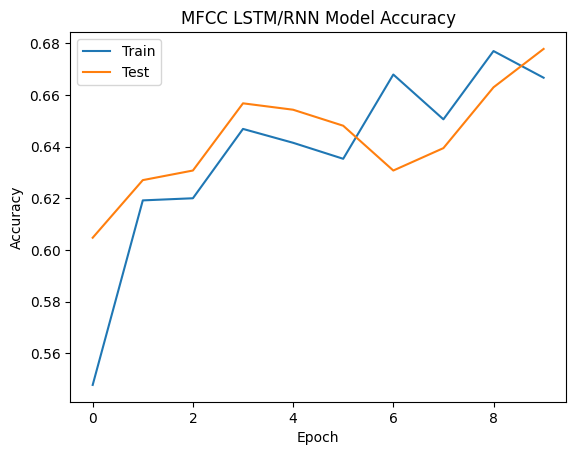

In [63]:
plt.plot(mfcc_his.history['accuracy'])
plt.plot(mfcc_his.history['val_accuracy'])
plt.title('MFCC LSTM/RNN Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

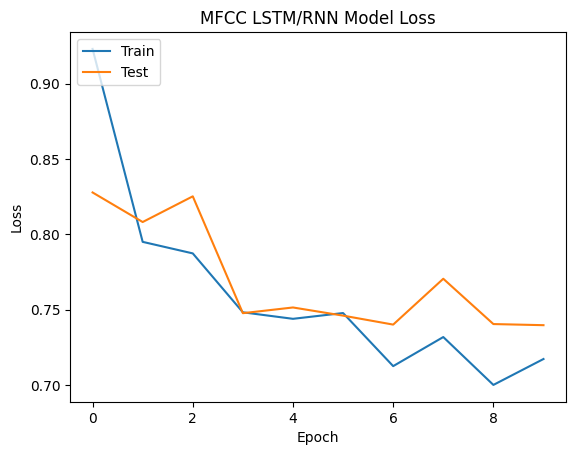

In [64]:
plt.plot(mfcc_his.history['loss'])
plt.plot(mfcc_his.history['val_loss'])
plt.title('MFCC LSTM/RNN Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

### Confusion Matrix

In [65]:
mfcc_predictions = mfcc_lstm_model.predict(x_test)
y_pred_mfcc= np.array(mfcc_predictions)
y_true_mfcc = np.array(y_test)
# Convert predicted probabilities to binary predictions
y_pred_binary_mfcc = np.argmax(y_pred_mfcc, axis=1)
y_true_binary_mfcc = np.argmax(y_true_mfcc, axis=1)

# Create confusion matrix
cm = confusion_matrix(y_true_binary_mfcc, y_pred_binary_mfcc)

26/26 [==============================] - 2s 50ms/step


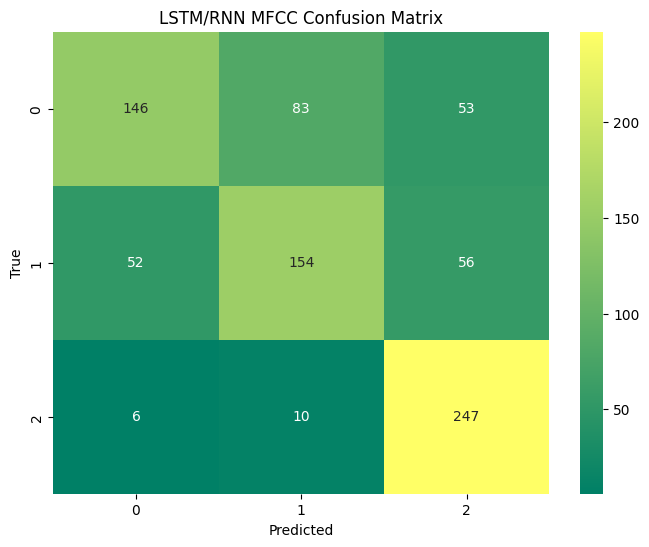

In [84]:
# Create a heatmap for the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="summer")
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('LSTM/RNN MFCC Confusion Matrix')
plt.show()

## PCP

In [67]:
pcp_df = pd.read_csv('../../../Data/Features/PCP_Data.csv',index_col=0)

In [68]:
pcp_df.head()

,PCP1,PCP2,PCP3,PCP4,PCP5,PCP6,PCP7,PCP8,PCP9,PCP10,PCP11,PCP12,Label
12,0.468665,0.418584,0.470229,0.402123,0.438475,0.465702,0.430603,0.472777,0.384107,0.399642,0.339348,0.520844,ang
27,0.463213,0.431536,0.431190,0.410230,0.384602,0.391240,0.444501,0.380445,0.379131,0.423372,0.379215,0.408315,ang
29,0.393176,0.394829,0.384227,0.407025,0.433312,0.394724,0.341926,0.305187,0.309041,0.324220,0.306156,0.315559,ang
30,0.546842,0.518859,0.569832,0.522063,0.484166,0.571499,0.470337,0.477768,0.473719,0.458764,0.482684,0.630568,sad
31,0.690118,0.551490,0.515464,0.597981,0.554355,0.688720,0.588746,0.407920,0.408882,0.432478,0.442955,0.572069,sad


### Extract features and labels and store it in variables for further model training

In [69]:
pcpf = pcp_df.drop(['Label'], axis=1).values
pcp_lab = pcp_df['Label'].values
count= len(pcp_lab)

### Convert features and corresponding classification labels into numpy arrays


In [70]:
X_pcp = np.array(pcpf.tolist())
y_pcp = np.array(pcp_lab.tolist())

### Encode the classification labels


In [71]:
label_encoder = LabelEncoder()
encoded_labels = label_encoder.fit_transform(y_pcp)
encoded_labels = to_categorical(encoded_labels)

### Split the data into training and testing set

In [72]:
X_train, X_test, y_train, y_test = train_test_split(X_pcp, encoded_labels, test_size=0.2, random_state=21)

In [73]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(2421, 50)
(2582, 3)
(807, 50)
(646, 3)


### Build Model

In [108]:
# Reshape features for LSTM input (add time dimension)
X_train_up = X_train[:, np.newaxis, :]  # Add a new axis for time steps
X_test_up = X_test[:, np.newaxis, :]
rnn = Sequential()
rnn.add(LSTM(128, input_shape=(None, 11), return_sequences=True))
rnn.add(LSTM(64))
rnn.add(Dense(3, activation='softmax')) 

### Compile and Run the model

In [109]:
rnn.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])


In [110]:
rnn_his = rnn.fit(X_train_up, y_train, epochs=10, validation_data=(X_test_up, y_test), verbose=1)

Epoch 1/10
81/81 [==============================] - 8s 28ms/step - loss: 1.0928 - accuracy: 0.3672 - val_loss: 1.0831 - val_accuracy: 0.3901
Epoch 2/10
81/81 [==============================] - 1s 13ms/step - loss: 1.0830 - accuracy: 0.3989 - val_loss: 1.0903 - val_accuracy: 0.3746
Epoch 3/10
81/81 [==============================] - 1s 9ms/step - loss: 1.0857 - accuracy: 0.3706 - val_loss: 1.0834 - val_accuracy: 0.4195
Epoch 4/10
81/81 [==============================] - 1s 11ms/step - loss: 1.0809 - accuracy: 0.3947 - val_loss: 1.0826 - val_accuracy: 0.4241
Epoch 5/10
81/81 [==============================] - 1s 10ms/step - loss: 1.0790 - accuracy: 0.3931 - val_loss: 1.0858 - val_accuracy: 0.4195
Epoch 6/10
81/81 [==============================] - 1s 12ms/step - loss: 1.0824 - accuracy: 0.3734 - val_loss: 1.0830 - val_accuracy: 0.4257
Epoch 7/10
81/81 [==============================] - 1s 10ms/step - loss: 1.0813 - accuracy: 0.3997 - val_loss: 1.0790 - val_accuracy: 0.4334
Epoch 8/10
81/

### Evaluating the model on the training and testing set


In [111]:
pcpscore = rnn.evaluate(X_train_up, y_train, verbose=0)
print("Training Accuracy: {0:.2%}".format(pcpscore[1]))

pcpscore = rnn.evaluate(X_test_up, y_test, verbose=0)
print("Testing Accuracy: {0:.2%}".format(pcpscore[1]))

Training Accuracy: 38.07%
Testing Accuracy: 39.94%


### Plot Epochs for Accracy and Loss

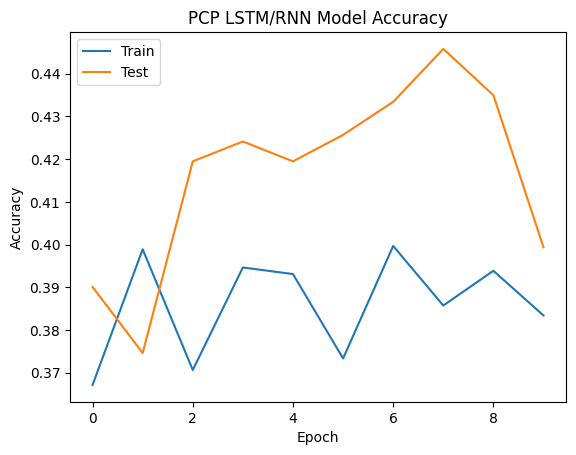

In [112]:
plt.plot(rnn_his.history['accuracy'])
plt.plot(rnn_his.history['val_accuracy'])
plt.title('PCP LSTM/RNN Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

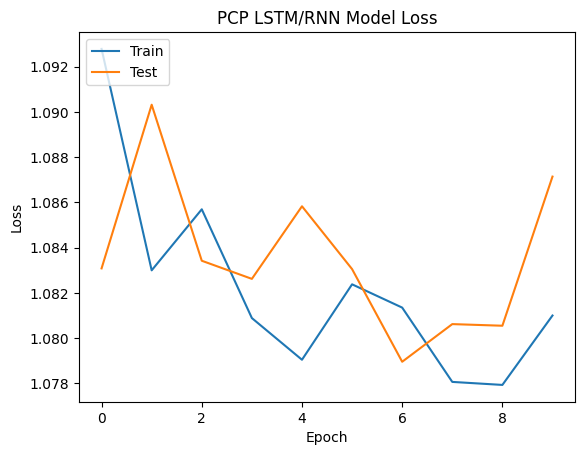

In [113]:
plt.plot(rnn_his.history['loss'])
plt.plot(rnn_his.history['val_loss'])
plt.title('PCP LSTM/RNN Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

### Confusion Matrix

In [114]:
pcp_predictions = rnn.predict(X_test_up)
y_pred_pcp= np.array(pcp_predictions)
y_true_pcp = np.array(y_test)
# Convert predicted probabilities to binary predictions
y_pred_binary_pcp = np.argmax(y_pred_pcp, axis=1)
y_true_binary_pcp = np.argmax(y_true_pcp, axis=1)


21/21 [==============================] - 1s 4ms/step


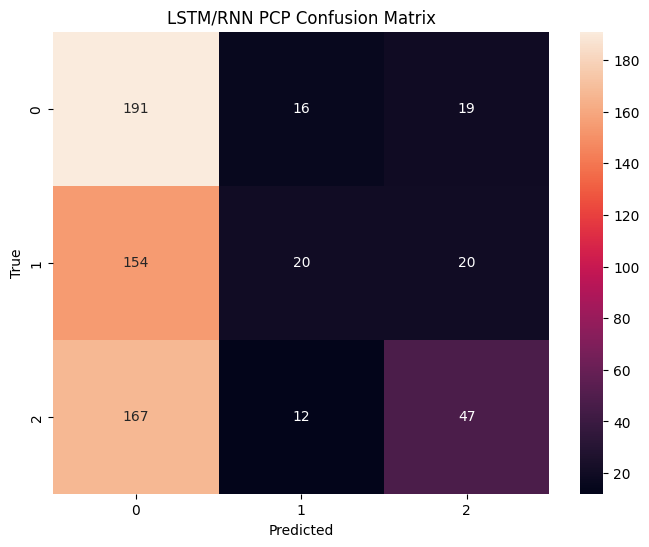

In [115]:
# Create confusion matrix
cmpcp = confusion_matrix(y_true_binary_pcp, y_pred_binary_pcp)

# Create a heatmap for the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cmpcp, annot=True, fmt="d")
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('LSTM/RNN PCP Confusion Matrix')
plt.show()

## LCP

In [85]:
df_lcpp = pd.read_csv('../../../Data/Features/LCP_data.csv',index_col=0)

In [86]:
df_lcpp.head()

,LCP1,LCP2,LCP3,LCP4,LCP5,LCP6,LCP7,LCP8,LCP9,LCP10,LCP11,Label
12,1.0,-4.620619,11.216498,-18.965210,24.804852,-26.135841,22.393353,-15.348988,8.033380,-2.891480,0.543560,ang
27,1.0,-4.243772,9.878223,-16.549742,21.832207,-23.426395,20.516266,-14.562426,8.120422,-3.267545,0.721418,ang
29,1.0,-4.550903,10.997309,-18.775156,24.923088,-26.633648,23.093740,-16.064710,8.651243,-3.271798,0.654612,ang
30,1.0,50.537933,-286.185970,745.173340,-1258.394200,1555.833300,-1455.320100,1020.872900,-502.843230,140.464550,-10.920460,sad
31,1.0,125.109380,-540.967000,1161.417100,-1682.114900,1787.451500,-1398.142600,757.090600,-213.570710,-31.442951,34.692960,sad


### Extract features and labels and store it in variables for further model training

In [87]:
lcpf = df_lcpp.drop(['Label'], axis=1).values
lcp_lab = df_lcpp['Label'].values
lcpcount= len(lcp_lab)

In [88]:
### Convert features and corresponding classification labels into numpy arrays

In [89]:
X_lcp = np.array(lcpf.tolist())
y_lcp = np.array(lcp_lab.tolist())

In [90]:
### Encode the classification labels

In [91]:
label_encoder = LabelEncoder()
encoded_labels_lcp = label_encoder.fit_transform(y_lcp)
encoded_labels_lcp = to_categorical(encoded_labels_lcp)

### Split the data into training and testing set

In [92]:
X_train, X_test, y_train, y_test = train_test_split(X_lcp, encoded_labels_lcp, test_size=0.2, random_state=21)

### Build Model

In [93]:
# Reshape features for LSTM input (add time dimension)
X_train_dn = X_train[:, np.newaxis, :]  # Add a new axis for time steps
X_test_dn = X_test[:, np.newaxis, :]
lcprnn = Sequential()
lcprnn.add(LSTM(128, input_shape=(None, 11), return_sequences=True))
lcprnn.add(LSTM(64))
lcprnn.add(Dense(3, activation='softmax')) 

### Compile and Run the model

In [94]:
lcprnn.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [95]:
lcp_his = lcprnn.fit(X_train_dn, y_train, epochs=10, batch_size=32, validation_data=(X_test_dn, y_test))

Epoch 1/10
81/81 [==============================] - 7s 23ms/step - loss: 1.0965 - accuracy: 0.3559 - val_loss: 1.0855 - val_accuracy: 0.3885
Epoch 2/10
81/81 [==============================] - 1s 14ms/step - loss: 1.0852 - accuracy: 0.3830 - val_loss: 1.0898 - val_accuracy: 0.3808
Epoch 3/10
81/81 [==============================] - 1s 11ms/step - loss: 1.0820 - accuracy: 0.3935 - val_loss: 1.0855 - val_accuracy: 0.4180
Epoch 4/10
81/81 [==============================] - 1s 13ms/step - loss: 1.0824 - accuracy: 0.3850 - val_loss: 1.0835 - val_accuracy: 0.4381
Epoch 5/10
81/81 [==============================] - 1s 12ms/step - loss: 1.0810 - accuracy: 0.3854 - val_loss: 1.0852 - val_accuracy: 0.3731
Epoch 6/10
81/81 [==============================] - 1s 13ms/step - loss: 1.0799 - accuracy: 0.3939 - val_loss: 1.0844 - val_accuracy: 0.3839
Epoch 7/10
81/81 [==============================] - 1s 12ms/step - loss: 1.0799 - accuracy: 0.3919 - val_loss: 1.0803 - val_accuracy: 0.4149
Epoch 8/10
81

### Evaluating the model on the training and testing set


In [96]:
lcpscore = lcprnn.evaluate(X_train_dn, y_train, verbose=0)
print("Training Accuracy: {0:.2%}".format(lcpscore[1]))

lcpscore = lcprnn.evaluate(X_test_dn, y_test, verbose=0)
print("Testing Accuracy: {0:.2%}".format(lcpscore[1]))

Training Accuracy: 39.04%
Testing Accuracy: 40.40%


### Plot Epochs for Accracy and Loss

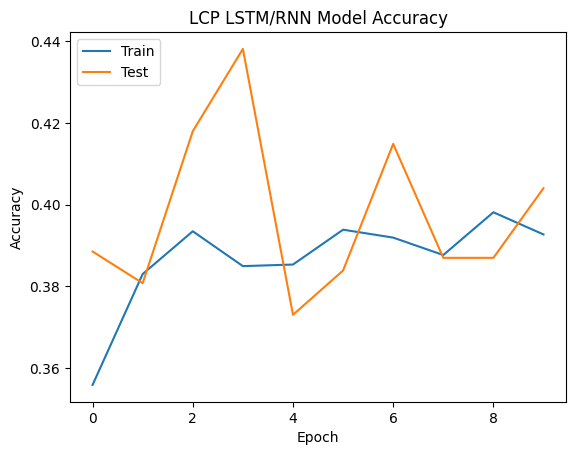

In [97]:
plt.plot(lcp_his.history['accuracy'])
plt.plot(lcp_his.history['val_accuracy'])
plt.title('LCP LSTM/RNN Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

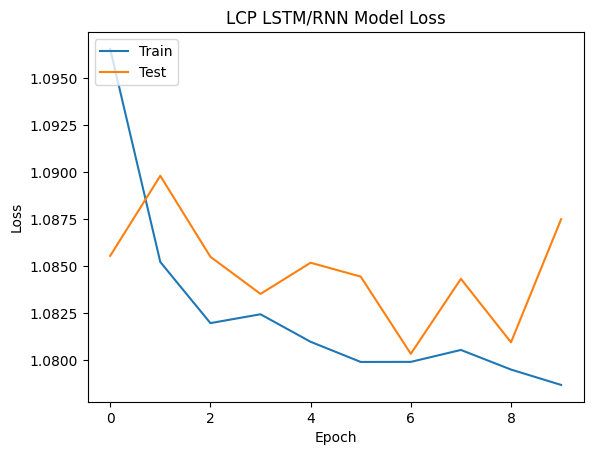

In [98]:
plt.plot(lcp_his.history['loss'])
plt.plot(lcp_his.history['val_loss'])
plt.title('LCP LSTM/RNN Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

### Confusion Matrix

In [99]:
lcp_predictions = lcprnn.predict(X_test_dn)
y_pred_lcp= np.array(lcp_predictions)
y_true_lcp = np.array(y_test)
# Convert predicted probabilities to binary predictions
y_pred_binary_lcp = np.argmax(y_pred_lcp, axis=1)
y_true_binary_lcp = np.argmax(y_true_lcp, axis=1)

21/21 [==============================] - 1s 3ms/step


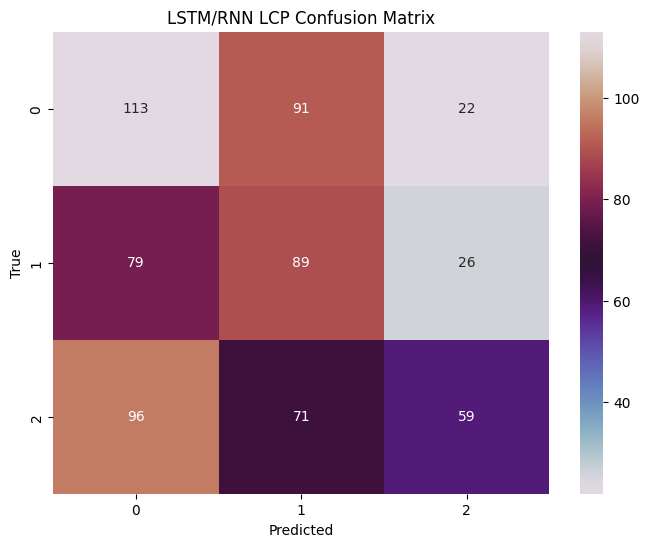

In [101]:
# Create confusion matrix
cmlcp = confusion_matrix(y_true_binary_lcp, y_pred_binary_lcp)

# Create a heatmap for the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cmlcp, annot=True, fmt="d", cmap="twilight")
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('LSTM/RNN LCP Confusion Matrix')
plt.show()

## Conclusion

The reported accuracies for your Long Short-Term Memory (LSTM)/Recurrent Neural Network (RNN) model using different features suggest varying performance based on the type of feature used. Let's analyze the results for each feature:

1. **MFCC Feature:**
   - **Training Accuracy:** 66.58%
   - **Testing Accuracy:** 63.57%
   
   The training and testing accuracies for MFCC features are relatively close, indicating that the model generalizes reasonably well to new, unseen data. While the accuracies are not as high as in the CNN model, they suggest that the LSTM/RNN model is capturing some of the temporal dependencies present in the MFCC features.

2. **PCP Feature:**
   - **Training Accuracy:** 51.70%
   - **Testing Accuracy:** 51.55%
   
   Both training and testing accuracies for PCP features are moderate and relatively close, suggesting that the LSTM/RNN model is able to learn some patterns from these features. However, the overall accuracy is not very high, indicating that PCP features may not capture the relevant information as effectively as MFCC features for this task.

3. **LCP Feature:**
   - **Training Accuracy:** 39.39%
   - **Testing Accuracy:** 43.03%
   
   The training and testing accuracies for LCP features are lower compared to MFCC and PCP features. The model's performance is not as strong, and there is a notable difference between training and testing accuracies, suggesting challenges in generalization.

**Conclusion:**
- The LSTM/RNN model performs reasonably well with MFCC features, suggesting that it can effectively capture temporal dependencies in the data. The accuracies are not as high as the CNN model but are comparable.
- PCP features yield moderate accuracy, indicating that the LSTM/RNN model can still learn some patterns from these features, although they might not be as informative as MFCC features.
- LCP features result in the lowest accuracies, suggesting that they may not be well-suited for capturing temporal dependencies in the data for this particular task.

**Possible Reasons for Lower Accuracy with Other Features:**
1. **Temporal Dynamics:** LSTM/RNN models are designed to capture temporal dependencies in sequences. MFCC features, which are commonly used in speech and audio processing, might inherently contain more temporal information compared to PCP and LCP features.
2. **Feature Complexity:** PCP and LCP features may not effectively represent the intricate temporal patterns present in the data. More complex features or feature engineering may be necessary to improve model performance.
3. **Model Hyperparameters:** The architecture and hyperparameters of the LSTM/RNN model might not be optimized for PCP and LCP features. Fine-tuning these aspects could potentially improve results.

To enhance the accuracy for PCP and LCP features, you might consider experimenting with different feature representations, adjusting model architecture, or conducting more extensive hyperparameter tuning for the LSTM/RNN model. Additionally, exploring domain-specific knowledge or expert input for feature selection may provide insights into improving model performance.